In [1]:
import tensorflow as tf

#  CNN architecture
model = tf.keras.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(128, 128, 1)),
    # Max Pooling Layer 1
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # conv Layer 2
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', activation='relu'),
    # Max Layer 2
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # Flatten layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layer 1
    tf.keras.layers.Dense(256, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()


/Users/reeve/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/reeve/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,872,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,880,394 (30.06 MB)

 Trainable params: 7,880,394 (30.06 MB)

 Non-trainable params: 0 (0.00 B)

A)
CONVOLUTION LAYER 124X124X16
MAX POOL 1  62X62X6
CONV L 2= 60X60X32
MAX P2= 30X30X2

B) excluding bias:: 400+4608+737280+2560=744848

In [2]:
#2)Q

In [3]:
import numpy as np
import pandas as pd
import os
import glob as gb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use("dark_background")

import tensorflow as tf
from keras import layers, callbacks
from keras.layers import *
from keras.models import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.optimizers import RMSprop

In [4]:
trainpath = "/Users/reeve/Desktop/DESK/MSc_AIML(++)/sem3/DL/Christmas/MY_data/train"
testpath = "/Users/reeve/Desktop/DESK/MSc_AIML(++)/sem3/DL/Christmas/MY_data/test"
predpath = "/Users/reeve/Desktop/DESK/MSc_AIML(++)/sem3/DL/Christmas/MY_data/predict"

for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath + "/" + folder + "/*.jpeg"))
    print(f"For training data, found {len(files)} images in folder {folder}")

For training data, found 230 images in folder Apple
For training data, found 230 images in folder avocado
For training data, found 230 images in folder kiwi
For training data, found 230 images in folder pinenapple
For training data, found 230 images in folder cherry
For training data, found 230 images in folder watermelon
For training data, found 231 images in folder mango
For training data, found 230 images in folder Banana
For training data, found 230 images in folder orange
For training data, found 230 images in folder strawberries


In [31]:
#counting the images of the each class of the testing dataset
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath + "/" + folder + "/*.jpeg"))
    print(f"For testing data, found {len(files)} images in folder {folder}")

For testing data, found 89 images in folder apple
For testing data, found 105 images in folder avocado
For testing data, found 103 images in folder stawberries
For testing data, found 105 images in folder kiwi
For testing data, found 105 images in folder pinenapple
For testing data, found 105 images in folder cherry
For testing data, found 105 images in folder watermelon
For testing data, found 105 images in folder mango
For testing data, found 106 images in folder banana
For testing data, found 97 images in folder orange


In [6]:
#number of files in the pred file
files = gb.glob(pathname=str(predpath+"/*.jpeg"))
print(len(files))

48


In [7]:
#total number of classes
classes=sorted(os.listdir(trainpath))
", ".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple, 1:Banana, 2:avocado, 3:cherry, 4:kiwi, 5:mango, 6:orange, 7:pinenapple, 8:strawberries, 9:watermelon'

In [8]:
#data augmentation
TRAINING_DIR = trainpath
TESTING_DIR = testpath

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )


testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)


validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

testing_generator = train_datagen.flow_from_directory(
    TESTING_DIR,
    classes=list(map(lambda x:x.lower().replace("strawberries","stawberries"),classes)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


Custom CNN

In [9]:

model = tf.keras.models.Sequential([
    #A good dose of augmentation so that training data is hard to memorize but not too much to make the learning difficult
    layers.RandomRotation(0.1,input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),

    #convolutional portion
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(64, 3,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(128, 4,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Flatten(),

    #Dense portion, with high dropout rate for a high regualization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# add callbacks for early stopping and lr reduction during training
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

model.summary()

/Users/reeve/Library/Python/3.9/lib/python/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise (GaussianNoise)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,082 (1.17 MB)

 Trainable params: 307,082 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# trainig
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=5,
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/5


/Users/reeve/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 991ms/step - accuracy: 0.1098 - loss: 2.3582 - val_accuracy: 0.1848 - val_loss: 2.1389 - learning_rate: 0.0050
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 800ms/step - accuracy: 0.1897 - loss: 2.1027 - val_accuracy: 0.2022 - val_loss: 1.9035 - learning_rate: 0.0050
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 808ms/step - accuracy: 0.2018 - loss: 1.9551 - val_accuracy: 0.2348 - val_loss: 1.8979 - learning_rate: 0.0050
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 804ms/step - accuracy: 0.2188 - loss: 1.9149 - val_accuracy: 0.2022 - val_loss: 1.8323 - learning_rate: 0.0050
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 809ms/step - accuracy: 0.2054 - loss: 1.8795 - val_accuracy: 0.2435 - val_loss: 1.8108 - learning_rate: 0.0050


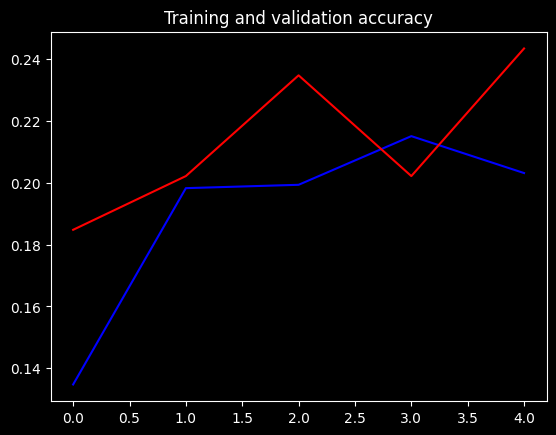

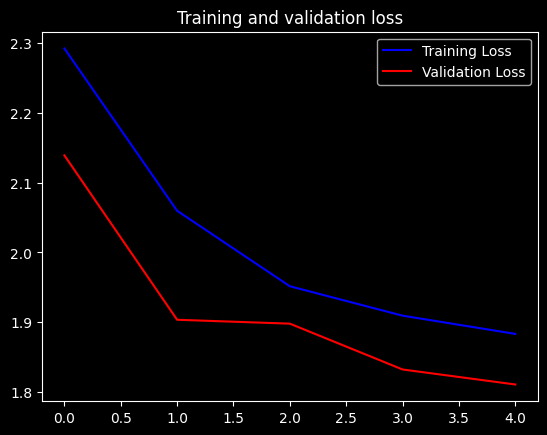

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'b', label='Training accuracy') # Changed color to red and marker to triangle (o)
plt.plot(epochs, val_acc, 'r', label='Validation accuracy') # Changed color to red
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'b', label='Training Loss') # Changed color to red and marker to triangle (o)
plt.plot(epochs, val_loss, 'r', label='Validation Loss') # Changed color to red
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [15]:
model.evaluate(testing_generator)
##loss #accuracy

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 487ms/step - accuracy: 0.2263 - loss: 1.8332


[1.7941420078277588, 0.2224390208721161]

In [16]:
# evaluating the model loss and accuracy
model.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.2433 - loss: 1.8502


[1.8184456825256348, 0.2652173936367035]

vgg-16

In [20]:
from keras.applications import VGG16
# Add VGG16 model
#------------------------------------------------
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional layers in VGG19
for layer in vgg16_base.layers:
    layer.trainable = False

vgg16_model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.6),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(classes), activation='softmax')
])

vgg16_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

vgg16_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
# Train the VGG19 model
history_vgg16 = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1,
    callbacks=callback_list
)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 310s 11s/step - accuracy: 0.0989 - loss: 3.2878 - val_accuracy: 0.1500 - val_loss: 2.2975 - learning_rate: 0.0010
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 428s 15s/step - accuracy: 0.1052 - loss: 2.3036 - val_accuracy: 0.1152 - val_loss: 2.3004 - learning_rate: 0.0010
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3065s 109s/step - accuracy: 0.1080 - loss: 2.3008 - val_accuracy: 0.1174 - val_loss: 2.2987 - learning_rate: 0.0010
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 304s 10s/step - accuracy: 0.1074 - loss: 2.2991 - val_accuracy: 0.1196 - val_loss: 2.2961 - learning_rate: 0.0010
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 305s 10s/step - accuracy: 0.1231 - loss: 2.2854 - val_accuracy: 0.1848 - val_loss: 2.2450 - learning_rate: 8.0000e-04


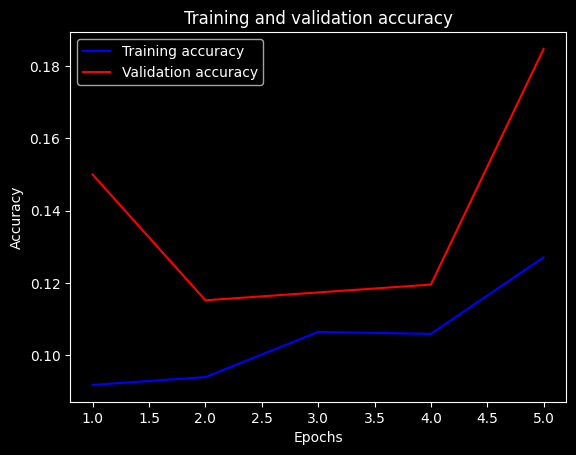

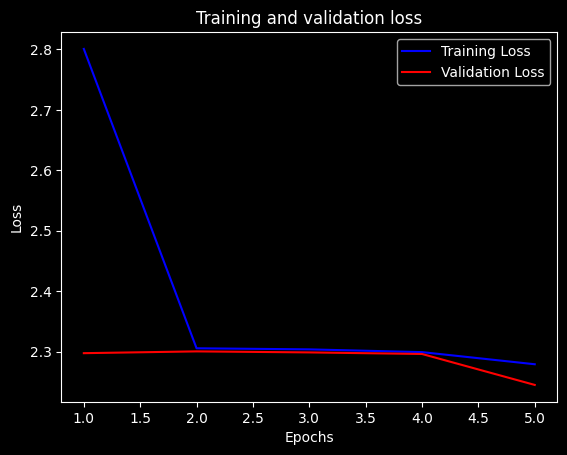

In [22]:
# Retrieve a list of list results on training and test data sets for each training epoch
acc_vgg16 = history_vgg16.history['accuracy']
val_acc_vgg16 = history_vgg16.history['val_accuracy']
loss_vgg16 = history_vgg16.history['loss']
val_loss_vgg16 = history_vgg16.history['val_loss']

epochs = range(1, len(acc) + 1) # Adjusted to start from 1

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc_vgg16, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_vgg16, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs, loss_vgg16, 'b', label='Training Loss')
plt.plot(epochs, val_loss_vgg16, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# just testing the dataa
vgg16_model.evaluate(testing_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.1088 - loss: 2.2996


[2.299293041229248, 0.1024390235543251]

In [27]:
# validating the to see if the testing which we have done is good or not
vgg16_model.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.1194 - loss: 2.2986


[2.2986364364624023, 0.13260869681835175]

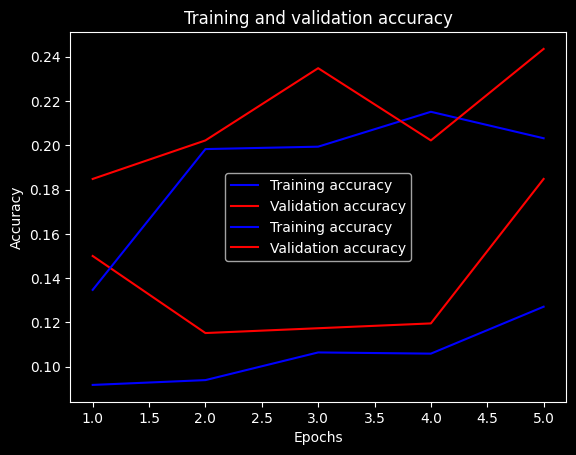

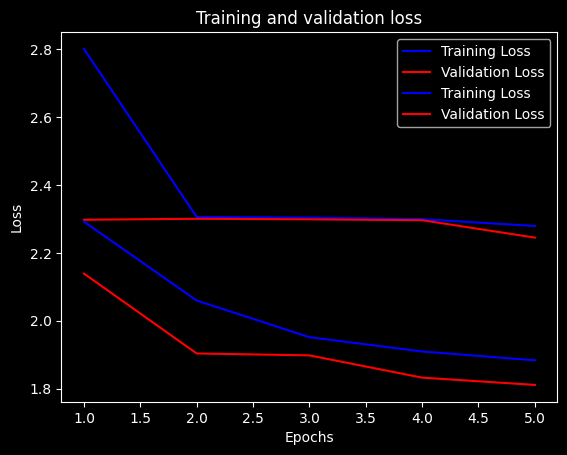

In [28]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc_vgg16, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_vgg16, 'r', label='Validation accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs, loss_vgg16, 'b', label='Training Loss')
plt.plot(epochs, val_loss_vgg16, 'r', label='Validation Loss')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 492ms/step


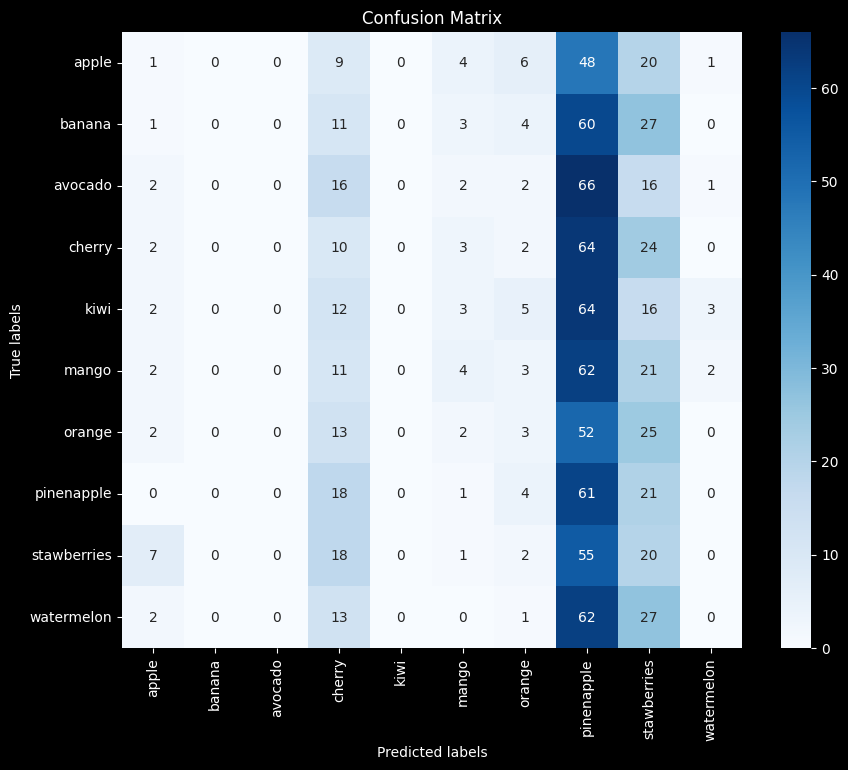

17/17 ━━━━━━━━━━━━━━━━━━━━ 134s 8s/step


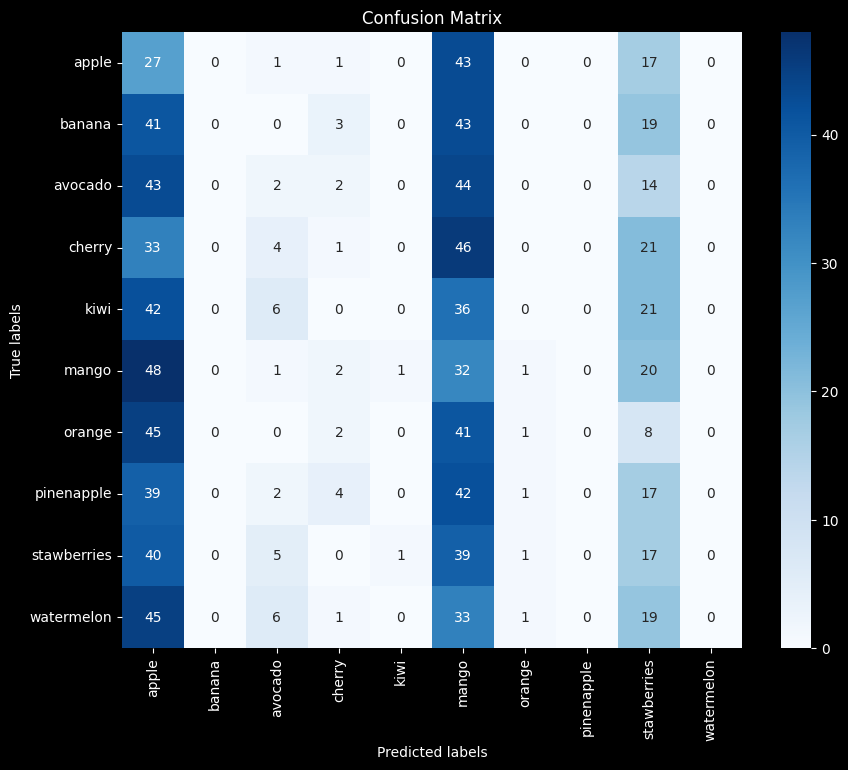

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(model, generator):
    # Get the predictions for the test data
    predictions = model.predict(generator)
    # Get the true labels
    true_labels = generator.classes
    # Convert predictions to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    # Get the class names
    class_names = list(generator.class_indices.keys())
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for custom CNN model
plot_confusion_matrix(model, testing_generator)

# Plot confusion matrix for VGG16 model
plot_confusion_matrix(vgg16_model, testing_generator)


In [30]:
from sklearn.metrics import classification_report

# Function to print classification report
def print_classification_report(model, generator):
    # Get the predictions for the test data
    predictions = model.predict(generator)
    # Get the true labels
    true_labels = generator.classes
    # Convert predictions to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    # Get the class names
    class_names = list(generator.class_indices.keys())
    
    # Print classification report
    print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Print classification report for custom CNN model
print("Custom CNN Model:")
print_classification_report(model, testing_generator)

# Print classification report for VGG16 model
print("VGG16 Model:")
print_classification_report(vgg16_model, testing_generator)


Custom CNN Model:
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 487ms/step
              precision    recall  f1-score   support

       apple       0.07      0.01      0.02        89
      banana       0.00      0.00      0.00       106
     avocado       0.00      0.00      0.00       105
      cherry       0.08      0.10      0.09       105
        kiwi       0.00      0.00      0.00       105
       mango       0.07      0.02      0.03       105
      orange       0.11      0.03      0.05        97
  pinenapple       0.10      0.56      0.17       105
 stawberries       0.10      0.22      0.14       103
  watermelon       0.20      0.02      0.03       105

    accuracy                           0.10      1025
   macro avg       0.07      0.10      0.05      1025
weighted avg       0.07      0.10      0.05      1025

VGG16 Model:


/Users/reeve/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reeve/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reeve/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

17/17 ━━━━━━━━━━━━━━━━━━━━ 134s 8s/step
              precision    recall  f1-score   support

       apple       0.08      0.36      0.13        89
      banana       0.00      0.00      0.00       106
     avocado       0.18      0.05      0.08       105
      cherry       0.22      0.02      0.04       105
        kiwi       0.00      0.00      0.00       105
       mango       0.12      0.45      0.19       105
      orange       0.00      0.00      0.00        97
  pinenapple       0.00      0.00      0.00       105
 stawberries       0.09      0.16      0.11       103
  watermelon       0.00      0.00      0.00       105

    accuracy                           0.10      1025
   macro avg       0.07      0.10      0.05      1025
weighted avg       0.07      0.10      0.05      1025



/Users/reeve/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reeve/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/reeve/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Custom CNN Model:

The overall accuracy of the Custom CNN model is 0.10, indicating that it correctly predicts the class of the images approximately 10% of the time.
Looking at precision, recall, and F1-score for each class:
The model performs poorly for most classes, with low precision, recall, and F1-score values.
Some classes like "pineapple" and "stawberries" have slightly better performance, with higher precision, recall, and F1-score compared to other classes.
Classes like "banana", "avocado", "kiwi", and "orange" have very low precision, recall, and F1-score, indicating poor performance in identifying these classes.
VGG16 Model:

The overall accuracy of the VGG16 model is also 0.10, which is the same as the Custom CNN model.
Similar to the Custom CNN model, the VGG16 model shows poor performance for most classes, with low precision, recall, and F1-score values.
Some classes like "apple", "avocado", "mango", and "stawberries" have slightly better performance compared to others.
However, classes like "banana", "cherry", "kiwi", "orange", "pineapple", and "watermelon" still have very low precision, recall, and F1-score.
Inference:

Both models exhibit similar performance in terms of overall accuracy and class-wise metrics.
Neither model performs well in correctly identifying the classes, as indicated by low precision, recall, and F1-score values across most classes.
It seems that both models struggle with distinguishing between different fruit classes, possibly due to the complexity and similarities between them in terms of visual features.
Further optimization of the models or exploration of more advanced architectures may be necessary to improve performance on this classification task.